# read in combined CARIACO csv

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
pd_CARIACO = pd.read_csv("../DATA/Combined_CARIACO_data_v3.csv")

In [3]:
pd_CARIACO['time_month_dt'] = pd.to_datetime(pd_CARIACO['time_month'])

In [4]:
pd_CARIACO = pd_CARIACO.drop(labels='Unnamed: 0', axis=1)

In [5]:
pd_CARIACO = pd_CARIACO.set_index('time_month_dt')
pd_CARIACO.index.rename('time', inplace=True)

In [6]:
## get metadata from the original netcdf files!

In [7]:
#pd.DataFrame(data={'par_names':pd_CARIACO.columns.values}).to_csv('CombinedCARIACOannotations.csv')

# convert to xarray dataset

In [8]:
from datetime import date

today = date.today()

In [9]:
str(today)

'2022-01-24'

In [10]:
metadata = {'creator': 'Benjamin Post', 'creation date': str(today)}
CARIACO = xr.Dataset.from_dataframe(pd_CARIACO)
CARIACO.attrs = metadata

# add Metadata programmatically
- add clear text variable names
- add units
- add data source
- add data group (biological, physical, chemical)

In [11]:
wind_meta = pd.read_csv("META/ERA5_META.csv")
wind_meta.columns

Index(['Unnamed: 0', 'GRIB_paramId', 'GRIB_shortName', 'GRIB_units',
       'GRIB_name', 'GRIB_cfVarName', 'GRIB_dataType', 'GRIB_missingValue',
       'GRIB_numberOfPoints', 'GRIB_totalNumber', 'GRIB_typeOfLevel',
       'GRIB_NV', 'GRIB_stepUnits', 'GRIB_stepType', 'GRIB_gridType',
       'GRIB_gridDefinitionDescription', 'GRIB_Nx',
       'GRIB_iDirectionIncrementInDegrees', 'GRIB_iScansNegatively',
       'GRIB_longitudeOfFirstGridPointInDegrees',
       'GRIB_longitudeOfLastGridPointInDegrees', 'GRIB_Ny',
       'GRIB_jDirectionIncrementInDegrees', 'GRIB_jPointsAreConsecutive',
       'GRIB_jScansPositively', 'GRIB_latitudeOfFirstGridPointInDegrees',
       'GRIB_latitudeOfLastGridPointInDegrees', 'long_name', 'units',
       'custom_name', 'GRIB_cfName', 'standard_name'],
      dtype='object')

In [12]:
niskin_meta = pd.read_csv("META/Niskin_PARAMETERS.csv", sep='\t')
niskin_meta

,Parameter,Description,Units
0,Cruise_number,number of cruise,integer (nnn)
1,Cruise_ID_1,cruise ID for OCB,alphanumeric
2,Cruise_ID_2,cruise ID for the CARIACO project,alphanumeric
3,Leg,number of cruise in the same month,integer (n)
4,Day,day of sampling in dd format,unitless
...,...,...,...
91,ISO_DateTime_end_hc_UTC,end date and time of hydrocast in UTC in ISO 8...,unitless
92,ISO_DateTime_start_bc_UTC,start time of biocast in UTC in ISO 8601 format,unitless
93,ISO_DateTime_end_bc_UTC,end time of biocast in UTC in ISO 8601 format,unitless
94,Latitude,Latitude of observations with positive values ...,decimal degrees


In [13]:
#zoo_meta = pd.read_csv("META/Zooplankton_PARAMETERS.csv", sep='\t')
#zoo_meta

## Source Metadata Loop

In [14]:
for var in CARIACO.data_vars:
    
    # add wind data METADATA
    wrow = wind_meta.loc[wind_meta['GRIB_cfVarName'] == var]
    if len(wrow) > 0:        
        CARIACO[var].attrs.update({'long_name':wrow['GRIB_name'].values[0],
                                  'units':wrow['GRIB_units'].values[0],
                                  'data_name':wrow['custom_name'].values[0],
                                  'source':'ERA5'})

    # add Niskin METADATA
    nrow = niskin_meta.loc[niskin_meta['Parameter'] == var]
    if len(nrow) > 0:
        CARIACO[var].attrs.update({'long_name':nrow['Description'].values[0],
                                  'units':nrow['Units'].values[0],
                                  'source':'niskin'})

## Manual metadata for computed values

In [15]:
CARIACO

<xarray.Dataset>
Dimensions:                       (time: 298)
Coordinates:
  * time                          (time) datetime64[ns] 1995-11-01 ... 2020-0...
Data variables:
    cdww                          (time) float64 0.0009123 0.0009341 ... nan
    iews                          (time) float64 -0.05435 -0.05757 ... nan
    inss                          (time) float64 -0.02569 -0.0315 ... nan
    mcc                           (time) float64 0.0971 0.07148 ... 0.1254 nan
    mwp                           (time) float64 5.125 5.149 5.239 ... 4.255 nan
    si10                          (time) float64 6.114 6.505 7.016 ... 6.192 nan
    sp                            (time) float64 1.011e+05 ... 1.012e+05
    sst                           (time) float64 300.7 299.3 298.5 ... 298.8 nan
    t2m                           (time) float64 299.7 298.9 298.1 ... 299.2 nan
    tauoc                         (time) float64 0.9785 0.9752 ... 0.9821 nan
    u10                           (time) float64 -5.306 -5.446 ... -5.139 nan
    ust                           (time) float64 -0.04214 -0.04413 ... -0.0266
    v10                           (time) float64 -2.556 -3.062 ... -2.662 nan
    v10n                          (time) float64 -2.637 -3.117 ... -2.618 nan
    vst                           (time) float64 -0.02757 -0.03264 ... -0.01738
    wind                          (time) float64 4.537 4.765 5.254 ... 4.385 nan
    time_month                    (time) object '11-1995' ... '07-2020'
    cdir                          (time) float64 1.908e+07 1.817e+07 ... nan
    e                             (time) float64 -0.003558 -0.00257 ... nan
    ewss                          (time) float64 -5.507e+03 -5.814e+03 ... nan
    i10fg                         (time) float64 8.638 8.923 9.613 ... 7.724 nan
    lsp                           (time) float64 0.0002081 5.61e-05 ... nan
    magss                         (time) float64 6.192e+03 6.761e+03 ... nan
    mer                           (time) float64 -4.118e-05 -2.975e-05 ... nan
    metss                         (time) float64 -0.06372 -0.06729 ... nan
    mmtss                         (time) float64 0.07169 0.07819 ... 0.06096 nan
    mntss                         (time) float64 -0.02875 -0.03522 ... nan
    mtpr                          (time) float64 1.188e-05 1.32e-06 ... nan
    nsss                          (time) float64 -2.489e+03 -3.043e+03 ... nan
    sshf                          (time) int64 -668755 -253528 ... 378882 64278
    tp                            (time) float64 0.001027 ... 0.0008499
    O2_ml_L                       (time) float64 4.067 3.439 3.405 ... nan nan
    O2_umol_kg                    (time) float64 177.3 149.8 148.3 ... nan nan
    NO3_UDO                       (time) float64 0.9218 3.095 7.512 ... nan nan
    PO4_UDO                       (time) float64 0.06163 0.2114 ... nan nan
    SiO4_UDO                      (time) float64 2.127 3.869 4.868 ... nan nan
    NH4_USF                       (time) float64 nan nan nan nan ... nan nan nan
    NO2_USF                       (time) float64 nan nan nan nan ... nan nan nan
    NO3_NO2_USF                   (time) float64 nan nan nan nan ... nan nan nan
    PO4_USF                       (time) float64 nan nan nan nan ... nan nan nan
    SiO4_USF                      (time) float64 nan nan nan nan ... nan nan nan
    pH                            (time) float64 nan 8.006 7.984 ... nan nan nan
    Alkalinity_mol_kg             (time) float64 0.002407 0.002409 ... nan nan
    Alkalinity_umol_kg            (time) float64 2.407e+03 2.409e+03 ... nan nan
    TCO2                          (time) float64 nan 2.108e+03 ... nan nan
    fCO2                          (time) float64 nan 433.7 444.5 ... nan nan nan
    pH_corrected                  (time) float64 nan 8.011 7.989 ... nan nan nan
    TCO2_corrected                (time) float64 nan 2.105e+03 ... nan nan
    fCO2_corrected                (time) float64 nan 427.5 438.1 ..

In [16]:
### Niskin computed values META

CARIACO.NO3_USF.attrs.update({'long_name':"USF Nitrate (intgr. 100m)",
                              'units':'μM',
                                  'source':'niskin'})
CARIACO.NO3_merged.attrs.update({'long_name':"Merged USF/UDO Nitrate (intgr. 100m)",
                              'units':'μM',
                                  'source':'niskin'})
CARIACO.PO4_merged.attrs.update({'long_name':"Merged USF/UDO Phosphate (intgr. 100m)",
                              'units':'μM',
                                  'source':'niskin'})
CARIACO.SiO4_merged.attrs.update({'long_name':"Merged USF/UDO Silicate (intgr. 100m)",
                              'units':'μM',
                                  'source':'niskin'})

In [17]:
### Satellite META

In [18]:
CARIACO.SeaWiFS_chla.attrs.update({'long_name':"SeaWiFS Chlorophyll monthly mean",
                              'units':'mg m^-3',
                                  'source':'satellite'})
CARIACO.MODIS_chla.attrs.update({'long_name':"MODIS Chlorophyll  monthly mean",
                              'units':'mg m^-3',
                                  'source':'satellite'})
CARIACO.Satellite_chla.attrs.update({'long_name':"SeaWiFS + MODIS Chlorophyll monthly mean",
                              'units':'mg m^-3',
                                  'source':'satellite'})

### CTD META

In [19]:
CARIACO.Isopycnal_21.attrs.update({'long_name':"21° Isotherm",
                                   'units':'m',
                                  'source':'ctd'})
CARIACO.MLD_potemp.attrs.update({'long_name':"MLD based on pot. temp",
                                 'units':'m',
                                  'source':'ctd'})

CARIACO.temp_5.attrs.update({'long_name':"Temperature in top 5 m",
                                 'units':'°C',
                                  'source':'ctd'})
CARIACO.temp_15.attrs.update({'long_name':"Temperature in top 15 m",
                                 'units':'°C',
                                  'source':'ctd'})
CARIACO.temp_25.attrs.update({'long_name':"Temperature in top 25 m",
                                 'units':'°C',
                                  'source':'ctd'})
CARIACO.temp_75.attrs.update({'long_name':"Temperature in top 75 m",
                                 'units':'°C',
                                  'source':'ctd'})

### Phytoplankton META

In [20]:
for var in CARIACO.data_vars:
    if var.startswith('counts'):
        CARIACO[var].attrs.update({'long_name':"FuncGroup Cell counts (intgr. 100m)",
                                 'units':'cells/ml',
                                  'source':'phytoplankton'})
    elif var.startswith('SR'):
        CARIACO[var].attrs.update({'long_name':"FuncGroup Species Richness (intgr. 100m)",
                                 'units':'number of species',
                                  'source':'phytoplankton'})

CARIACO.species_richness.attrs.update({'long_name':"Total Species Richness (intgr. 100m)",
                                 'units':'number of species',
                                  'source':'phytoplankton'})

### Zooplankton META

In [21]:
CARIACO.Mesh200.attrs.update({'long_name':"Biomass Mesh 200",
                                 'units':'mg/m^3',
                                  'source':'zooplankton'})
CARIACO.Mesh500.attrs.update({'long_name':"Biomass Mesh 500",
                                 'units':'mg/m^3',
                                  'source':'zooplankton'})
CARIACO.total_biomass.attrs.update({'long_name':"Total Zooplankton Biomasss (200+500 mesh size)",
                                 'units':'mg/m^3',
                                  'source':'zooplankton'})

## Categorize Variables

ERA5
- wind speed
- waves
- wind stress
- precipitiation
- evaporation
- temperature
- radiation
- misc

CARIACO time series
- Physical
- Biological
- Chemical

In [22]:
ERA5_wind_speed = [
    # wind speed
    '10m_u_component_of_wind', 
    '10m_v_component_of_neutral_wind', 
    '10m_v_component_of_wind',
    '10m_wind_speed',
    'instantaneous_10m_wind_gust', 
]

ERA5_waves = [
    # waves
    'mean_wave_period',
    'coefficient_of_drag_with_waves',
]

ERA5_wind_stress = [
    # wind stress    
    'instantaneous_eastward_turbulent_surface_stress', 
    'instantaneous_northward_turbulent_surface_stress',
    
    'eastward_turbulent_surface_stress',
    'mean_eastward_turbulent_surface_stress',
    'northward_turbulent_surface_stress',
    'mean_northward_turbulent_surface_stress',
    
    'magnitude_of_turbulent_surface_stress',
    'mean_magnitude_of_turbulent_surface_stress',

    'normalized_stress_into_ocean',
    'ocean_surface_stress_equivalent_10m_neutral_wind_speed',
]
 
ERA5_precipitation = [
    # precipitation
    'large_scale_precipitation',
    'mean_total_precipitation_rate',
    'total_precipitation',
]

ERA5_evaporation = [
    # evaporation
    'evaporation',
    'mean_evaporation_rate',
]

ERA5_temp = [
    # temp
    '2m_temperature',
    'sea_surface_temperature',
]

ERA5_radiation = [
    # radiation
    'clear_sky_direct_solar_radiation_at_surface',
    'medium_cloud_cover',
]

ERA5_misc = [
    # misc
    'surface_pressure',
    'surface_sensible_heat_flux',
    
    'v_component_stokes_drift',
    'u_component_stokes_drift',                     
                          ]

In [23]:
CAR_biological = [
    'TPP',
    'PIP',
    'POC_ug_kg',
    'PON_ug_kg',
    'POC_ug_L',
    'PN_ug_L',
    'C_N_particulate',
    'DON',
    'DOP',
    'DOC',
    'TOC',
    'PrimaryProductivity',
    'Chlorophyll',
    'Phaeopigments',
    'Total_Prokaryotes',
    'Bact_Biomass_mgC_m3',
    'Bact_Biomass_uMC',
    'SR_COCCOLITHOPHORIDS',
    'SR_CYANOBACTERIA',
    'SR_DIATOMS',
    'SR_DINOFLAGELLATES',
    'SR_OTHERS',
    'species_richness',
    'counts_int_COCCOLITHOPHORIDS',
    'counts_int_DIATOMS',
    'counts_int_DINOFLAGELLATES',
    'counts_int_CYANOBACTERIA',
    'counts_int_OTHERS',
    'counts_int_NANOFLAGELLATES',
    'Mesh200',
    'Mesh500',
    'total_biomass',
]

CAR_physical = [
    'Salinity_bottles',
    'Salinity_CTD',
    'Temperature',
    'Sigma_t',
    'temp_5',
    'temp_15',
    'temp_25',
    'temp_75',
    'Isopycnal_21',
    'MLD_potemp',
]

CAR_chemical = [
    'O2_ml_L',
    'O2_umol_kg',
    'NO3_UDO',
    'PO4_UDO',
    'SiO4_UDO',
    'NH4_USF',
    'NO2_USF',
    'NO3_NO2_USF',
    'PO4_USF',
    'SiO4_USF',
    'pH',
    'Alkalinity_mol_kg',
    'Alkalinity_umol_kg',
    'TCO2',
    'fCO2',
    'pH_corrected',
    'TCO2_corrected',
    'fCO2_corrected',
    'NO3_USF',
    'NO3_merged',
    'PO4_merged',
    'SiO4_merged',
]

In [24]:
for var in CARIACO.data_vars:
    if 'data_name' in CARIACO[var].attrs:
        if CARIACO[var].attrs['data_name'] in ERA5_wind_speed:
            CARIACO[var].attrs.update(subset='wind speed')
        elif CARIACO[var].attrs['data_name'] in ERA5_waves:
            CARIACO[var].attrs.update(subset='waves')
        elif CARIACO[var].attrs['data_name'] in ERA5_wind_stress:
            CARIACO[var].attrs.update(subset='wind stress')
        elif CARIACO[var].attrs['data_name'] in ERA5_precipitation:
            CARIACO[var].attrs.update(subset='precipitation')
        elif CARIACO[var].attrs['data_name'] in ERA5_evaporation:
            CARIACO[var].attrs.update(subset='evaporation')
        elif CARIACO[var].attrs['data_name'] in ERA5_temp:
            CARIACO[var].attrs.update(subset='temperature')
        elif CARIACO[var].attrs['data_name'] in ERA5_radiation:
            CARIACO[var].attrs.update(subset='radiation')
        elif CARIACO[var].attrs['data_name'] in ERA5_misc:
            CARIACO[var].attrs.update(subset='misc')
        else:
            pass      
    
    if var in CAR_biological:
        CARIACO[var].attrs.update(subset='biological')
    elif var in CAR_physical:
        CARIACO[var].attrs.update(subset='physical')
    elif var in CAR_chemical:
        CARIACO[var].attrs.update(subset='chemical')
    else:
        pass
        

In [25]:
CARIACO

<xarray.Dataset>
Dimensions:                       (time: 298)
Coordinates:
  * time                          (time) datetime64[ns] 1995-11-01 ... 2020-0...
Data variables:
    cdww                          (time) float64 0.0009123 0.0009341 ... nan
    iews                          (time) float64 -0.05435 -0.05757 ... nan
    inss                          (time) float64 -0.02569 -0.0315 ... nan
    mcc                           (time) float64 0.0971 0.07148 ... 0.1254 nan
    mwp                           (time) float64 5.125 5.149 5.239 ... 4.255 nan
    si10                          (time) float64 6.114 6.505 7.016 ... 6.192 nan
    sp                            (time) float64 1.011e+05 ... 1.012e+05
    sst                           (time) float64 300.7 299.3 298.5 ... 298.8 nan
    t2m                           (time) float64 299.7 298.9 298.1 ... 299.2 nan
    tauoc                         (time) float64 0.9785 0.9752 ... 0.9821 nan
    u10                           (time) float64 -5.306 -5.446 ... -5.139 nan
    ust                           (time) float64 -0.04214 -0.04413 ... -0.0266
    v10                           (time) float64 -2.556 -3.062 ... -2.662 nan
    v10n                          (time) float64 -2.637 -3.117 ... -2.618 nan
    vst                           (time) float64 -0.02757 -0.03264 ... -0.01738
    wind                          (time) float64 4.537 4.765 5.254 ... 4.385 nan
    time_month                    (time) object '11-1995' ... '07-2020'
    cdir                          (time) float64 1.908e+07 1.817e+07 ... nan
    e                             (time) float64 -0.003558 -0.00257 ... nan
    ewss                          (time) float64 -5.507e+03 -5.814e+03 ... nan
    i10fg                         (time) float64 8.638 8.923 9.613 ... 7.724 nan
    lsp                           (time) float64 0.0002081 5.61e-05 ... nan
    magss                         (time) float64 6.192e+03 6.761e+03 ... nan
    mer                           (time) float64 -4.118e-05 -2.975e-05 ... nan
    metss                         (time) float64 -0.06372 -0.06729 ... nan
    mmtss                         (time) float64 0.07169 0.07819 ... 0.06096 nan
    mntss                         (time) float64 -0.02875 -0.03522 ... nan
    mtpr                          (time) float64 1.188e-05 1.32e-06 ... nan
    nsss                          (time) float64 -2.489e+03 -3.043e+03 ... nan
    sshf                          (time) int64 -668755 -253528 ... 378882 64278
    tp                            (time) float64 0.001027 ... 0.0008499
    O2_ml_L                       (time) float64 4.067 3.439 3.405 ... nan nan
    O2_umol_kg                    (time) float64 177.3 149.8 148.3 ... nan nan
    NO3_UDO                       (time) float64 0.9218 3.095 7.512 ... nan nan
    PO4_UDO                       (time) float64 0.06163 0.2114 ... nan nan
    SiO4_UDO                      (time) float64 2.127 3.869 4.868 ... nan nan
    NH4_USF                       (time) float64 nan nan nan nan ... nan nan nan
    NO2_USF                       (time) float64 nan nan nan nan ... nan nan nan
    NO3_NO2_USF                   (time) float64 nan nan nan nan ... nan nan nan
    PO4_USF                       (time) float64 nan nan nan nan ... nan nan nan
    SiO4_USF                      (time) float64 nan nan nan nan ... nan nan nan
    pH                            (time) float64 nan 8.006 7.984 ... nan nan nan
    Alkalinity_mol_kg             (time) float64 0.002407 0.002409 ... nan nan
    Alkalinity_umol_kg            (time) float64 2.407e+03 2.409e+03 ... nan nan
    TCO2                          (time) float64 nan 2.108e+03 ... nan nan
    fCO2                          (time) float64 nan 433.7 444.5 ... nan nan nan
    pH_corrected                  (time) float64 nan 8.011 7.989 ... nan nan nan
    TCO2_corrected                (time) float64 nan 2.105e+03 ... nan nan
    fCO2_corrected                (time) float64 nan 427.5 438.1 ..

# SAVE FILE TO USE ELSEWHERE

In [26]:
CARIACO.to_netcdf("CARIACO_merged_03.nc")

In [316]:
#chl_pd.values
from matplotlib.pyplot import figure
def plot_yearmonth_cmap(data, bottom0=False, negativemax=False):
    
    figure(figsize=(7, 8), dpi=80)
    data_pd = data.to_dataframe()
    
    dat_pivot = (data_pd.assign(year=data_pd.index.year, month=data_pd.index.month)#.unstack()
      .pivot_table(index='year', columns='month', values=data.name)
    )
    ax = plt.gca()
    if negativemax == True:
        c = plt.pcolormesh(dat_pivot, cmap='cividis_r')
    else:
        c = plt.pcolormesh(dat_pivot, cmap='cividis')
        
    cbar = plt.colorbar(c)
    
    #print(data.attrs['long_name'])
    
    cbar.set_label(data.attrs['long_name'] + ' ' + data.attrs['units'])
    if bottom0 == True:
        plt.clim(0)
    else:
        pass
    
    ax.set_yticks(np.arange(0,len(dat_pivot.index.values)))
    ax.set_yticklabels(dat_pivot.index.values)
    ax.set_ylabel('Years')
    
    ax.set_xticks(np.arange(0,12)+1-0.5)
    ax.set_xticklabels(np.arange(1,13))
    ax.set_xlabel('Months')

    plt.show()

<Figure size 560x640 with 0 Axes>

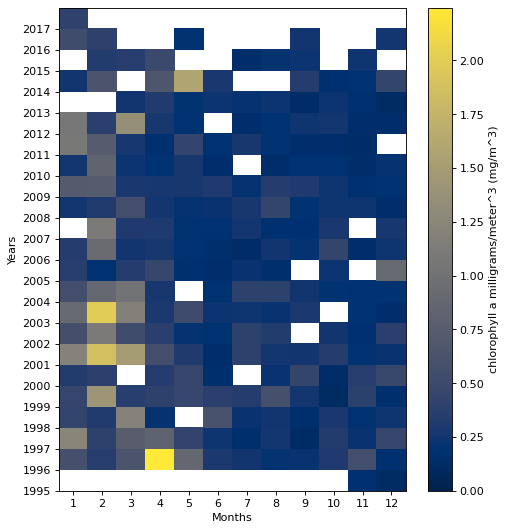

In [317]:
from matplotlib.pyplot import figure
figure(figsize=(7, 8), dpi=80)

plot_yearmonth_cmap(CARIACO.Chlorophyll, bottom0=True)

In [219]:
#CARIACO.u10

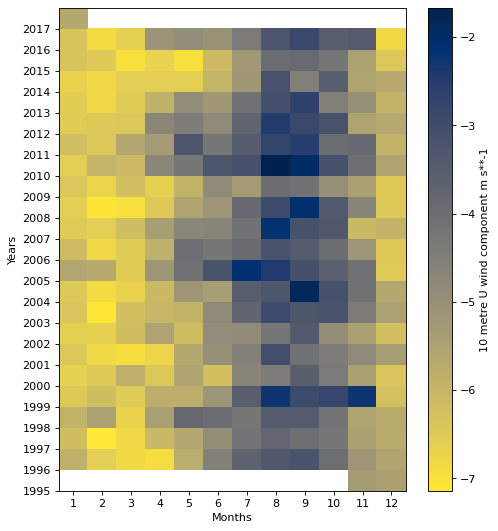

In [318]:
plot_yearmonth_cmap(CARIACO.u10, negativemax=True)

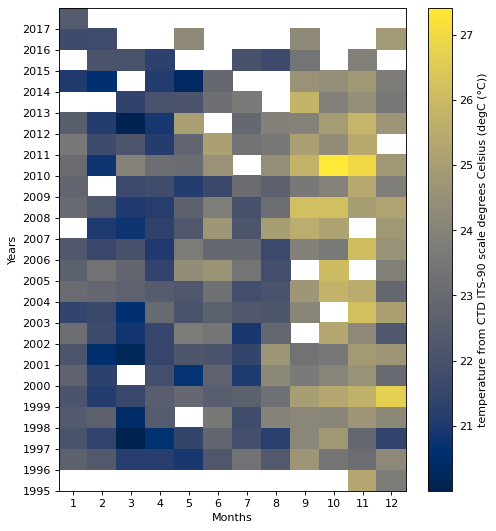

In [322]:
plot_yearmonth_cmap(CARIACO.Temperature)

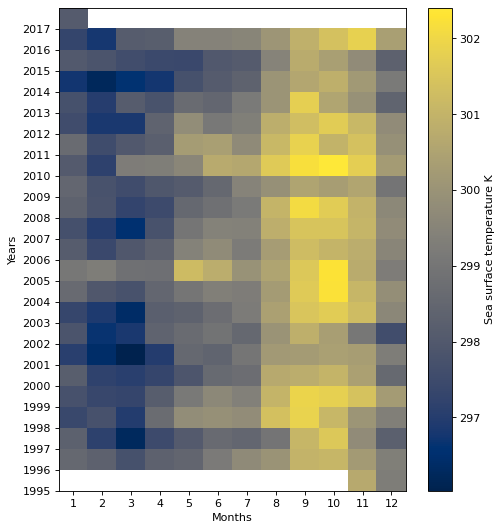

In [321]:
plot_yearmonth_cmap(CARIACO.sst)

# export to ncdf for plotting etc.